In [55]:
import numpy as np
from typing import List
from pydantic import BaseModel
from sklearn.cluster import DBSCAN
from prisma import Prisma
from sklearn.metrics.pairwise import cosine_distances

In [56]:
class ClusterableObject(BaseModel):
    id: int
    embedding: List[float]

In [61]:
db = Prisma()
db.connect()

In [71]:
query = f"""SELECT id, embedding::real[] FROM "ValuesCard" WHERE embedding IS NOT NULL;"""
cards = db.query_raw(query, model=ClusterableObject)

[ 0 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1]


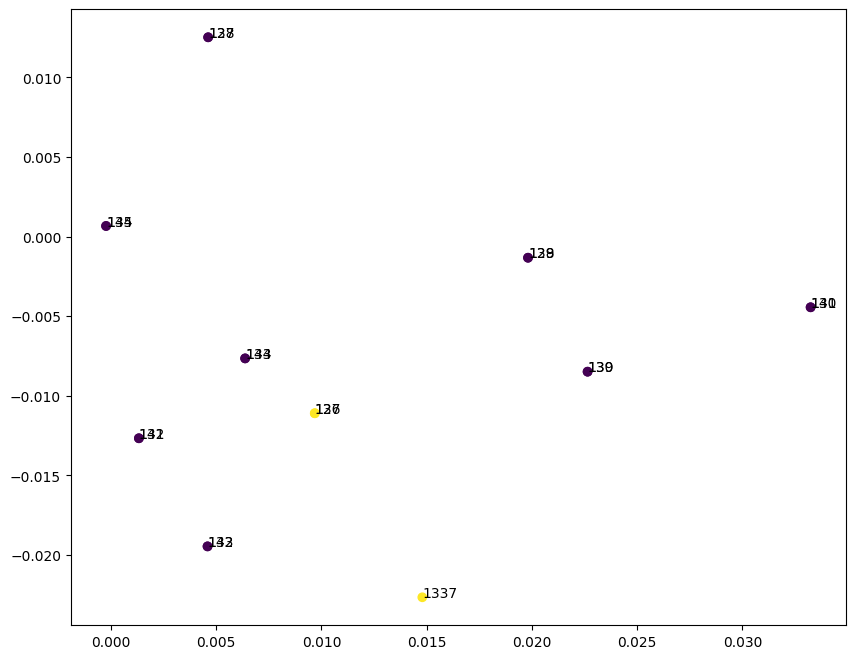

In [68]:
embeddings = np.array([obj.embedding for obj in cards])
distance_matrix = cosine_distances(embeddings)
# Run DBSCAN
clustering = DBSCAN(eps=0.11, min_samples=3, metric="precomputed").fit(
    distance_matrix
)

print(clustering.labels_)

# Plot the result with card IDs as annotations
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=clustering.labels_)
for i, txt in enumerate([obj.id for obj in cards]):
    plt.annotate(str(txt), (embeddings[i, 0], embeddings[i, 1]))
plt.show()